# Font-type Recognition with <font color=gree>CNN / ConvNets : Convolutional Neural Networks</font> using <font color= #b30047>[Keras](https://keras.io/)</font>
<img src=https://s3.amazonaws.com/keras.io/img/keras-logo-2018-large-1200.png width=200 height = 70>


* <font size=5 color='green'>[MSTC](http://mstc.ssr.upm.es/big-data-track) seminar on Deep Learning, Tensorflow & Keras</font>

In [2]:
! pip install --upgrade tqdm

Requirement already up-to-date: tqdm in /usr/local/lib/python3.6/dist-packages (4.23.3)


In [3]:
import keras
from keras.utils import to_categorical

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline


try:
    from tqdm import tqdm, tqdm_notebook
except ImportError:
    def tqdm(x, *args, **kwargs):
        return x
      
print('Keras version: ',keras.__version__)

Using TensorFlow backend.


Keras version:  2.1.6


## <font color= #00cc00>Next cells load the Font Type dataset:</font>


In [0]:
"""
Load and data
"""

import os
from six.moves import urllib

file_url = 'https://github.com/bloolizard/PlayWithTensorFlow/raw/master/data_with_labels.npz'
file_name = 'data_with_labels.npz'

if not os.path.exists(file_name):
    urllib.request.urlretrieve(file_url, file_name)
    
    
# Load data
data = np.load('data_with_labels.npz')

train = data['arr_0']/255.
labels = data['arr_1']

onehot= to_categorical(labels, num_classes=len(np.unique(labels)))

## Preparing Train/Test Data :
- ### Random Permutation! + split data into training / validation

In [0]:
# Split data into training (90%) and validation (10%)
np.random.seed(100)

indices = np.random.permutation(train.shape[0])

valid_cnt = int(train.shape[0] * 0.1)

test_idx, training_idx = indices[:valid_cnt],\
                         indices[valid_cnt:]
  
test, train = train[test_idx,:],\
              train[training_idx,:]
  
onehot_test, onehot_train = onehot[test_idx,:],\
                        onehot[training_idx,:]


In [6]:
train=train.reshape([-1,train.shape[1],train.shape[2],1])
test=test.reshape([-1,test.shape[1],test.shape[2],1])

print('Train shape=', train.shape , '\nTest shape=', test.shape)

Train shape= (2511, 36, 36, 1) 
Test shape= (279, 36, 36, 1)


## Try CNN / ConvNet models in Keras (remember):

1.   **Define your model**. Create a sequence and add layers.
2.   **Compile your model**. Specify loss functions and optimizers
3.   **Fit your model**. Execute the model using data.
4.   **Make predictions**. Use the model to generate predictions on new data.


## 1.   **Define your ConNet model**:

## ...a model similar as the one we used in TensorFlow...

In [0]:
from keras.models import Sequential

from keras.layers import MaxPooling2D, Dropout, Dense, Flatten

from keras.layers import Convolution2D as Conv2D

model = Sequential()

# input: 36x36 images with 1 channel -> (36, 36) tensors.
# this applies 4 convolution filters of size 5x5 each.
model.add(Conv2D(4, (5, 5), activation='relu', input_shape=(36, 36,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax'))


## <font color=green> You can try other  ConvNet styles: i.e. VGG style
  
  [ConvNet Arquitectures](https://medium.com/@siddharthdas_32104/cnns-architectures-lenet-alexnet-vgg-googlenet-resnet-and-more-666091488df5)
  
  **CNNs Architectures: LeNet, AlexNet, VGG, GoogLeNet, ResNet and more …**

    The ImageNet project is a large visual database designed for use in visual object recognition software research. The ImageNet project runs an annual software contest, the ImageNet Large Scale Visual Recognition Challenge (ILSVRC), where software programs compete to correctly classify and detect objects and scenes

In [0]:
### TRY to define YOUR OWN MODEL!!!

# model = Sequential()


## 2.   **Compile your model**. Specify loss functions and optimizers

In [0]:
from keras.optimizers import SGD


model.compile(loss='categorical_crossentropy',
              optimizer=SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True),
              metrics=['accuracy'])

In [9]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 4)         104       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 4)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                32800     
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 165       
Total params: 33,069
Trainable params: 33,069
Non-trainable params: 0
_________________________________________________________________


# 3.   **Fit your model**. Train the model using data.

In [10]:
# history to analyze training history evolution

# validation_data allows to see evaluation on test while training
history=model.fit(train, onehot_train,
         epochs=100,
         batch_size=128,
         validation_data=(test, onehot_test),
         verbose=1)

Train on 2511 samples, validate on 279 samples
Epoch 1/100
2511/2511 [==============================] - 1s 532us/step - loss: 1.5947 - acc: 0.2401 - val_loss: 1.5356 - val_acc: 0.2652
Epoch 2/100
2511/2511 [==============================] - 1s 464us/step - loss: 1.4895 - acc: 0.3182 - val_loss: 1.3823 - val_acc: 0.3477
Epoch 3/100
2511/2511 [==============================] - 2s 666us/step - loss: 1.3623 - acc: 0.3986 - val_loss: 1.2176 - val_acc: 0.5054
Epoch 4/100
2511/2511 [==============================] - 2s 665us/step - loss: 1.2014 - acc: 0.4970 - val_loss: 1.0342 - val_acc: 0.5986
Epoch 5/100
2511/2511 [==============================] - 2s 668us/step - loss: 1.0838 - acc: 0.5333 - val_loss: 0.9693 - val_acc: 0.6022
Epoch 6/100
2511/2511 [==============================] - 2s 663us/step - loss: 1.0025 - acc: 0.5675 - val_loss: 0.8842 - val_acc: 0.6559
Epoch 7/100
1664/2511 [==================>...........] - ETA: 0s - loss: 0.9321 - acc: 0.5823

2511/2511 [==============================] - 2s 668us/step - loss: 0.9455 - acc: 0.5822 - val_loss: 0.8377 - val_acc: 0.6523
Epoch 8/100
2511/2511 [==============================] - 2s 669us/step - loss: 0.9094 - acc: 0.6033 - val_loss: 0.8283 - val_acc: 0.6416
Epoch 9/100
2511/2511 [==============================] - 2s 662us/step - loss: 0.8595 - acc: 0.6376 - val_loss: 0.7705 - val_acc: 0.6631
Epoch 10/100
2511/2511 [==============================] - 2s 671us/step - loss: 0.8431 - acc: 0.6197 - val_loss: 0.7668 - val_acc: 0.6703
Epoch 11/100
2511/2511 [==============================] - 2s 664us/step - loss: 0.8393 - acc: 0.6121 - val_loss: 0.7556 - val_acc: 0.6882
Epoch 12/100
2511/2511 [==============================] - 2s 677us/step - loss: 0.7959 - acc: 0.6519 - val_loss: 0.7315 - val_acc: 0.7097
Epoch 13/100
2511/2511 [==============================] - 2s 668us/step - loss: 0.7895 - acc: 0.6491 - val_loss: 0.6987 - val_acc: 0.6559
Epoch 14/100
2511/2511 [=========================

2511/2511 [==============================] - 2s 669us/step - loss: 0.7393 - acc: 0.6758 - val_loss: 0.6710 - val_acc: 0.7240
Epoch 16/100
2511/2511 [==============================] - 2s 669us/step - loss: 0.7270 - acc: 0.6714 - val_loss: 0.6451 - val_acc: 0.7276
Epoch 17/100
2511/2511 [==============================] - 2s 667us/step - loss: 0.7007 - acc: 0.6906 - val_loss: 0.6501 - val_acc: 0.7348
Epoch 18/100
2511/2511 [==============================] - 2s 671us/step - loss: 0.6807 - acc: 0.7049 - val_loss: 0.6281 - val_acc: 0.7240
Epoch 19/100
2511/2511 [==============================] - 2s 665us/step - loss: 0.6580 - acc: 0.7093 - val_loss: 0.5974 - val_acc: 0.7670
Epoch 20/100
2511/2511 [==============================] - 2s 663us/step - loss: 0.6389 - acc: 0.7196 - val_loss: 0.5595 - val_acc: 0.8029
Epoch 21/100
2511/2511 [==============================] - 2s 668us/step - loss: 0.6349 - acc: 0.7232 - val_loss: 0.5450 - val_acc: 0.8280
Epoch 22/100
2511/2511 [=======================

2511/2511 [==============================] - 2s 664us/step - loss: 0.5886 - acc: 0.7479 - val_loss: 0.5154 - val_acc: 0.8208
Epoch 24/100
2511/2511 [==============================] - 2s 661us/step - loss: 0.5738 - acc: 0.7563 - val_loss: 0.4830 - val_acc: 0.8208
Epoch 25/100
2511/2511 [==============================] - 2s 663us/step - loss: 0.5454 - acc: 0.7646 - val_loss: 0.4803 - val_acc: 0.8351
Epoch 26/100
2511/2511 [==============================] - 2s 668us/step - loss: 0.5338 - acc: 0.7770 - val_loss: 0.4450 - val_acc: 0.8495
Epoch 27/100
2511/2511 [==============================] - 2s 667us/step - loss: 0.5025 - acc: 0.7957 - val_loss: 0.4265 - val_acc: 0.8638
Epoch 28/100
2511/2511 [==============================] - 2s 665us/step - loss: 0.4909 - acc: 0.8037 - val_loss: 0.3984 - val_acc: 0.8710
Epoch 29/100
2511/2511 [==============================] - 2s 666us/step - loss: 0.4517 - acc: 0.8168 - val_loss: 0.3810 - val_acc: 0.8602
Epoch 30/100
2511/2511 [=======================

2511/2511 [==============================] - 2s 670us/step - loss: 0.4289 - acc: 0.8292 - val_loss: 0.3497 - val_acc: 0.8602
Epoch 32/100
2511/2511 [==============================] - 2s 662us/step - loss: 0.4165 - acc: 0.8407 - val_loss: 0.3302 - val_acc: 0.8710
Epoch 33/100
2511/2511 [==============================] - 2s 666us/step - loss: 0.3990 - acc: 0.8475 - val_loss: 0.3006 - val_acc: 0.8746
Epoch 34/100
2511/2511 [==============================] - 2s 672us/step - loss: 0.3882 - acc: 0.8451 - val_loss: 0.3009 - val_acc: 0.8710
Epoch 35/100
2511/2511 [==============================] - 2s 669us/step - loss: 0.3680 - acc: 0.8610 - val_loss: 0.2809 - val_acc: 0.8925
Epoch 36/100
2511/2511 [==============================] - 2s 662us/step - loss: 0.3705 - acc: 0.8550 - val_loss: 0.2875 - val_acc: 0.8817
Epoch 37/100
2511/2511 [==============================] - 2s 658us/step - loss: 0.3501 - acc: 0.8658 - val_loss: 0.2629 - val_acc: 0.9104
Epoch 38/100
2511/2511 [=======================

2511/2511 [==============================] - 2s 666us/step - loss: 0.3057 - acc: 0.8893 - val_loss: 0.2411 - val_acc: 0.9104
Epoch 40/100
2511/2511 [==============================] - 2s 666us/step - loss: 0.3085 - acc: 0.8869 - val_loss: 0.2546 - val_acc: 0.8925
Epoch 41/100
2511/2511 [==============================] - 2s 666us/step - loss: 0.2982 - acc: 0.8869 - val_loss: 0.2385 - val_acc: 0.9068
Epoch 42/100
2511/2511 [==============================] - 2s 672us/step - loss: 0.3010 - acc: 0.8841 - val_loss: 0.2318 - val_acc: 0.9104
Epoch 43/100
2511/2511 [==============================] - 2s 665us/step - loss: 0.2862 - acc: 0.8881 - val_loss: 0.2151 - val_acc: 0.9176
Epoch 44/100
2511/2511 [==============================] - 2s 670us/step - loss: 0.2755 - acc: 0.8937 - val_loss: 0.2202 - val_acc: 0.9211
Epoch 45/100
2511/2511 [==============================] - 2s 665us/step - loss: 0.2637 - acc: 0.9092 - val_loss: 0.2147 - val_acc: 0.9032
Epoch 46/100
2511/2511 [=======================

2511/2511 [==============================] - 2s 664us/step - loss: 0.2513 - acc: 0.9036 - val_loss: 0.2039 - val_acc: 0.9104
Epoch 48/100
2511/2511 [==============================] - 2s 663us/step - loss: 0.2380 - acc: 0.9160 - val_loss: 0.1932 - val_acc: 0.9283
Epoch 49/100
2511/2511 [==============================] - 2s 661us/step - loss: 0.2428 - acc: 0.9112 - val_loss: 0.2069 - val_acc: 0.9104
Epoch 50/100
2511/2511 [==============================] - 2s 664us/step - loss: 0.2408 - acc: 0.9112 - val_loss: 0.1844 - val_acc: 0.9247
Epoch 51/100
2511/2511 [==============================] - 2s 670us/step - loss: 0.2413 - acc: 0.9012 - val_loss: 0.1893 - val_acc: 0.9211
Epoch 52/100
2511/2511 [==============================] - 2s 664us/step - loss: 0.2208 - acc: 0.9148 - val_loss: 0.1816 - val_acc: 0.9247
Epoch 53/100
2511/2511 [==============================] - 2s 658us/step - loss: 0.2282 - acc: 0.9100 - val_loss: 0.1709 - val_acc: 0.9247
Epoch 54/100
2511/2511 [=======================

2511/2511 [==============================] - 2s 668us/step - loss: 0.2201 - acc: 0.9136 - val_loss: 0.1734 - val_acc: 0.9391
Epoch 56/100
2511/2511 [==============================] - 2s 661us/step - loss: 0.1980 - acc: 0.9307 - val_loss: 0.1719 - val_acc: 0.9391
Epoch 57/100
2511/2511 [==============================] - 2s 670us/step - loss: 0.1951 - acc: 0.9283 - val_loss: 0.1657 - val_acc: 0.9427
Epoch 58/100
2511/2511 [==============================] - 2s 663us/step - loss: 0.1953 - acc: 0.9255 - val_loss: 0.1556 - val_acc: 0.9427
Epoch 59/100
2511/2511 [==============================] - 2s 665us/step - loss: 0.1994 - acc: 0.9231 - val_loss: 0.1613 - val_acc: 0.9355
Epoch 60/100
2511/2511 [==============================] - 2s 666us/step - loss: 0.1837 - acc: 0.9375 - val_loss: 0.1601 - val_acc: 0.9283
Epoch 61/100
2511/2511 [==============================] - 2s 668us/step - loss: 0.1852 - acc: 0.9311 - val_loss: 0.1571 - val_acc: 0.9427
Epoch 62/100
2511/2511 [=======================

2511/2511 [==============================] - 2s 669us/step - loss: 0.1889 - acc: 0.9323 - val_loss: 0.1486 - val_acc: 0.9427
Epoch 64/100
2511/2511 [==============================] - 2s 665us/step - loss: 0.1764 - acc: 0.9343 - val_loss: 0.1579 - val_acc: 0.9355
Epoch 65/100
2511/2511 [==============================] - 2s 667us/step - loss: 0.1649 - acc: 0.9387 - val_loss: 0.1629 - val_acc: 0.9355
Epoch 66/100
2511/2511 [==============================] - 2s 664us/step - loss: 0.1720 - acc: 0.9375 - val_loss: 0.1633 - val_acc: 0.9355
Epoch 67/100
2511/2511 [==============================] - 2s 669us/step - loss: 0.1731 - acc: 0.9331 - val_loss: 0.1503 - val_acc: 0.9462
Epoch 68/100
2511/2511 [==============================] - 2s 659us/step - loss: 0.1749 - acc: 0.9299 - val_loss: 0.1512 - val_acc: 0.9391
Epoch 69/100
2511/2511 [==============================] - 2s 671us/step - loss: 0.1657 - acc: 0.9391 - val_loss: 0.1358 - val_acc: 0.9534
Epoch 70/100
2511/2511 [=======================

2511/2511 [==============================] - 2s 668us/step - loss: 0.1462 - acc: 0.9427 - val_loss: 0.1447 - val_acc: 0.9391
Epoch 72/100
2511/2511 [==============================] - 2s 668us/step - loss: 0.1559 - acc: 0.9419 - val_loss: 0.1438 - val_acc: 0.9462
Epoch 73/100
2511/2511 [==============================] - 2s 667us/step - loss: 0.1579 - acc: 0.9411 - val_loss: 0.1421 - val_acc: 0.9391
Epoch 74/100
2511/2511 [==============================] - 2s 663us/step - loss: 0.1423 - acc: 0.9470 - val_loss: 0.1374 - val_acc: 0.9498
Epoch 75/100
2511/2511 [==============================] - 2s 664us/step - loss: 0.1447 - acc: 0.9474 - val_loss: 0.1456 - val_acc: 0.9391
Epoch 76/100
2511/2511 [==============================] - 2s 670us/step - loss: 0.1450 - acc: 0.9482 - val_loss: 0.1330 - val_acc: 0.9462
Epoch 77/100
2511/2511 [==============================] - 2s 667us/step - loss: 0.1517 - acc: 0.9423 - val_loss: 0.1296 - val_acc: 0.9355
Epoch 78/100
2511/2511 [=======================

2511/2511 [==============================] - 2s 672us/step - loss: 0.1347 - acc: 0.9554 - val_loss: 0.1251 - val_acc: 0.9462
Epoch 80/100
2511/2511 [==============================] - 2s 663us/step - loss: 0.1403 - acc: 0.9462 - val_loss: 0.1270 - val_acc: 0.9534
Epoch 81/100
2511/2511 [==============================] - 2s 665us/step - loss: 0.1365 - acc: 0.9506 - val_loss: 0.1324 - val_acc: 0.9570
Epoch 82/100
2511/2511 [==============================] - 2s 669us/step - loss: 0.1327 - acc: 0.9510 - val_loss: 0.1218 - val_acc: 0.9462
Epoch 83/100
2511/2511 [==============================] - 2s 662us/step - loss: 0.1306 - acc: 0.9514 - val_loss: 0.1082 - val_acc: 0.9534
Epoch 84/100
2511/2511 [==============================] - 2s 666us/step - loss: 0.1260 - acc: 0.9526 - val_loss: 0.1019 - val_acc: 0.9462
Epoch 85/100
2511/2511 [==============================] - 2s 666us/step - loss: 0.1376 - acc: 0.9506 - val_loss: 0.1134 - val_acc: 0.9462
Epoch 86/100
2511/2511 [=======================

2511/2511 [==============================] - 2s 664us/step - loss: 0.1272 - acc: 0.9526 - val_loss: 0.1143 - val_acc: 0.9570
Epoch 88/100
2511/2511 [==============================] - 2s 665us/step - loss: 0.1244 - acc: 0.9566 - val_loss: 0.1244 - val_acc: 0.9462
Epoch 89/100
2511/2511 [==============================] - 2s 671us/step - loss: 0.1190 - acc: 0.9574 - val_loss: 0.1194 - val_acc: 0.9462
Epoch 90/100
2511/2511 [==============================] - 2s 661us/step - loss: 0.1188 - acc: 0.9554 - val_loss: 0.1197 - val_acc: 0.9498
Epoch 91/100
2511/2511 [==============================] - 2s 667us/step - loss: 0.1186 - acc: 0.9582 - val_loss: 0.1144 - val_acc: 0.9534
Epoch 92/100
2511/2511 [==============================] - 2s 665us/step - loss: 0.1172 - acc: 0.9570 - val_loss: 0.1118 - val_acc: 0.9534
Epoch 93/100
2511/2511 [==============================] - 2s 661us/step - loss: 0.1082 - acc: 0.9606 - val_loss: 0.1107 - val_acc: 0.9606
Epoch 94/100
2511/2511 [=======================

2511/2511 [==============================] - 2s 681us/step - loss: 0.1193 - acc: 0.9554 - val_loss: 0.1067 - val_acc: 0.9570
Epoch 96/100
2511/2511 [==============================] - 2s 666us/step - loss: 0.1166 - acc: 0.9538 - val_loss: 0.1074 - val_acc: 0.9534
Epoch 97/100
2511/2511 [==============================] - 2s 666us/step - loss: 0.1073 - acc: 0.9578 - val_loss: 0.1047 - val_acc: 0.9606
Epoch 98/100
2511/2511 [==============================] - 2s 667us/step - loss: 0.1176 - acc: 0.9574 - val_loss: 0.1026 - val_acc: 0.9606
Epoch 99/100
2511/2511 [==============================] - 2s 668us/step - loss: 0.1086 - acc: 0.9606 - val_loss: 0.1162 - val_acc: 0.9570
Epoch 100/100
2511/2511 [==============================] - 2s 664us/step - loss: 0.1067 - acc: 0.9626 - val_loss: 0.1139 - val_acc: 0.9534


## 4.   **Make predictions**. Use the model to generate predictions on new data.

In [11]:
# Check accuracy on train set

loss_train, accuracy_train = model.evaluate(train, onehot_train, batch_size=128)


print('\nTraining Accuracy=', accuracy_train)

# Check accuracy on test set

loss, accuracy = model.evaluate(test, onehot_test, batch_size=128)


print('\nTest Accuracy=', accuracy)

2511/2511 [==============================] - 1s 229us/step

Training Accuracy= 0.9956192751891677
279/279 [==============================] - 0s 261us/step

Test Accuracy= 0.953405015571143


In [12]:
print(history.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


Train Accuracy:  0.96
Test_Accuracy:  0.95


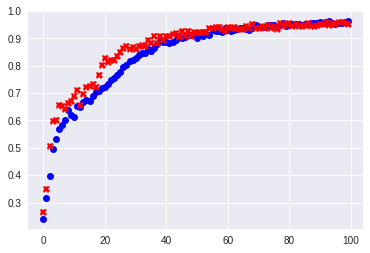

In [13]:
print('Train Accuracy: ',np.round(history.history['acc'][-1],2))
print('Test_Accuracy: ',np.round(history.history['val_acc'][-1],2))

# Plot the accuracy curves
plt.plot(history.history['acc'],'bo')
plt.plot(history.history['val_acc'],'rX')

# Get predictions / probabilities ...

In [14]:
pred_probabilities= model.predict(test)

print('First Five Probs.:\n',pred_probabilities[0:5])

print('\n\nFirst Five Classes:\n',onehot_test[0:5])

First Five Probs.:
 [[5.3183123e-07 9.7221900e-03 1.3698963e-08 4.0720278e-04 9.8987001e-01]
 [1.1269559e-04 9.9986172e-01 1.8835981e-05 6.7452152e-06 8.3177936e-09]
 [6.4367890e-12 1.0844819e-02 6.8250012e-13 1.6052660e-04 9.8899466e-01]
 [6.6637391e-01 6.1872845e-05 3.3356416e-01 1.2329984e-10 2.0782419e-11]
 [1.7102568e-27 2.0372043e-03 3.3673338e-29 9.9796283e-01 6.0044707e-09]]


First Five Classes:
 [[0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]]


## Confusion Matrix

In [15]:
!pip install pandas_ml

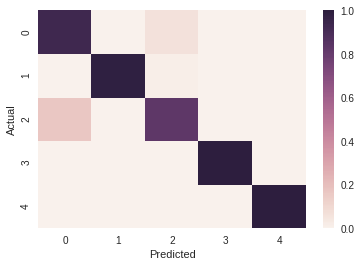

In [17]:
from pandas_ml import ConfusionMatrix

ConfMatrix=ConfusionMatrix(np.argmax(onehot_test,1), np.argmax(pred_probabilities,1))

ConfMatrix.plot(normalized=True,backend='seaborn')

In [18]:
ConfMatrix.print_stats()

Confusion Matrix:

Predicted   0   1   2   3   4  __all__
Actual                                
0          57   0   4   0   0       61
1           0  70   1   0   0       71
2           8   0  40   0   0       48
3           0   0   0  43   0       43
4           0   0   0   0  56       56
__all__    65  70  45  43  56      279


Overall Statistics:

Accuracy: 0.953405017921147
95% CI: (0.9216390667092866, 0.9749601338596147)
No Information Rate: ToDo
P-Value [Acc > NIR]: 3.287323149254193e-140
Kappa: 0.9412736192742993
Mcnemar's Test P-Value: ToDo


Class Statistics:

Classes                                        0           1         2  \
Population                                   279         279       279   
P: Condition positive                         61          71        48   
N: Condition negative                        218         208       231   
Test outcome positive                         65          70        45   
Test outcome negative                        214     

/usr/local/lib/python3.6/dist-packages/pandas_ml/confusion_matrix/bcm.py:332: RuntimeWarning: divide by zero encountered in double_scalars
  return(np.float64(self.TPR) / self.FPR)


Confusion Matrix:
 [[58  0  3  0  0]
 [ 0 69  1  0  1]
 [ 8  0 40  0  0]
 [ 0  0  0 43  0]
 [ 0  0  0  0 56]]


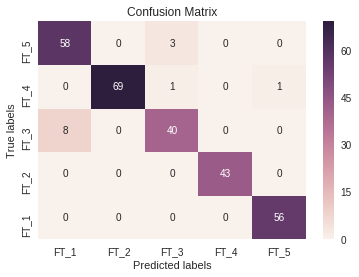

In [0]:
import seaborn as sns

from sklearn.metrics import confusion_matrix as cm

ConfMatrix=cm(np.argmax(onehot_test,1), np.argmax(pred_probabilities,1))

print('Confusion Matrix:\n',ConfMatrix)

ax= plt.subplot()
sns.heatmap(ConfMatrix, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

ax.xaxis.set_ticklabels(['FT_1', 'FT_2','FT_3','FT_4','FT_5'])
ax.yaxis.set_ticklabels(['FT_1', 'FT_2','FT_3','FT_4','FT_5']);